In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

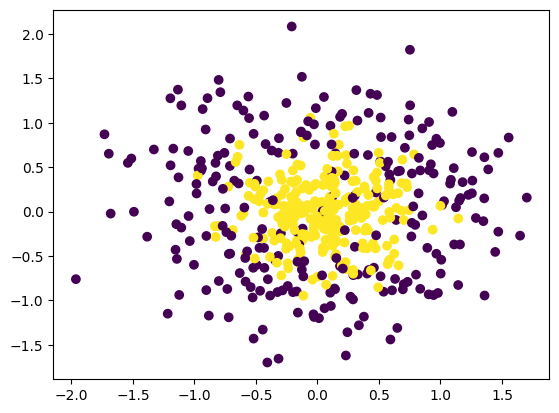

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

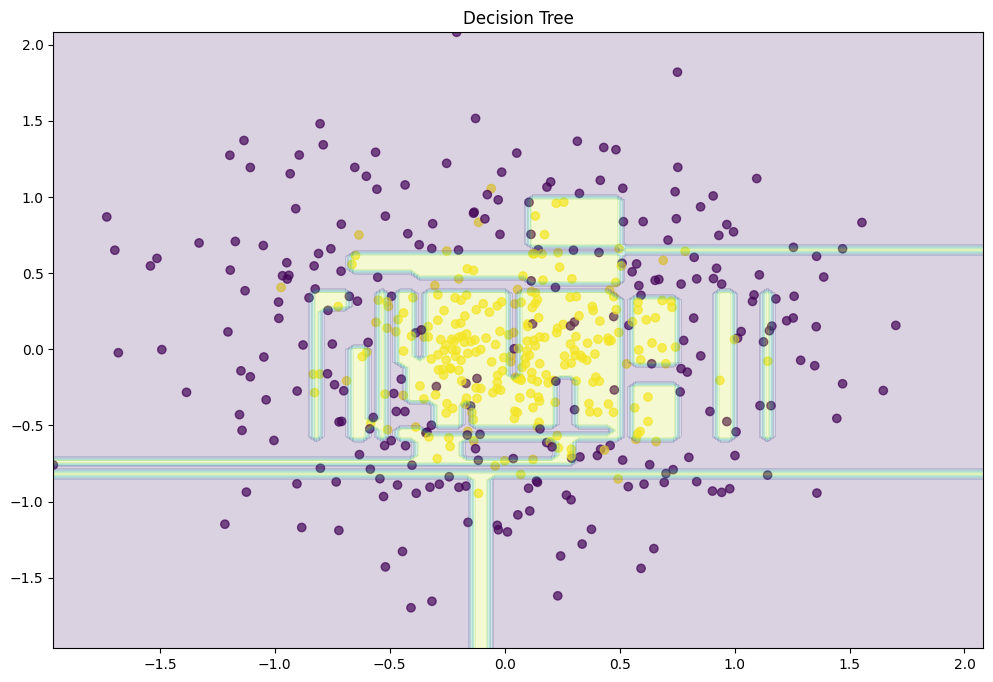

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=.7)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.title("Decision Tree")
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

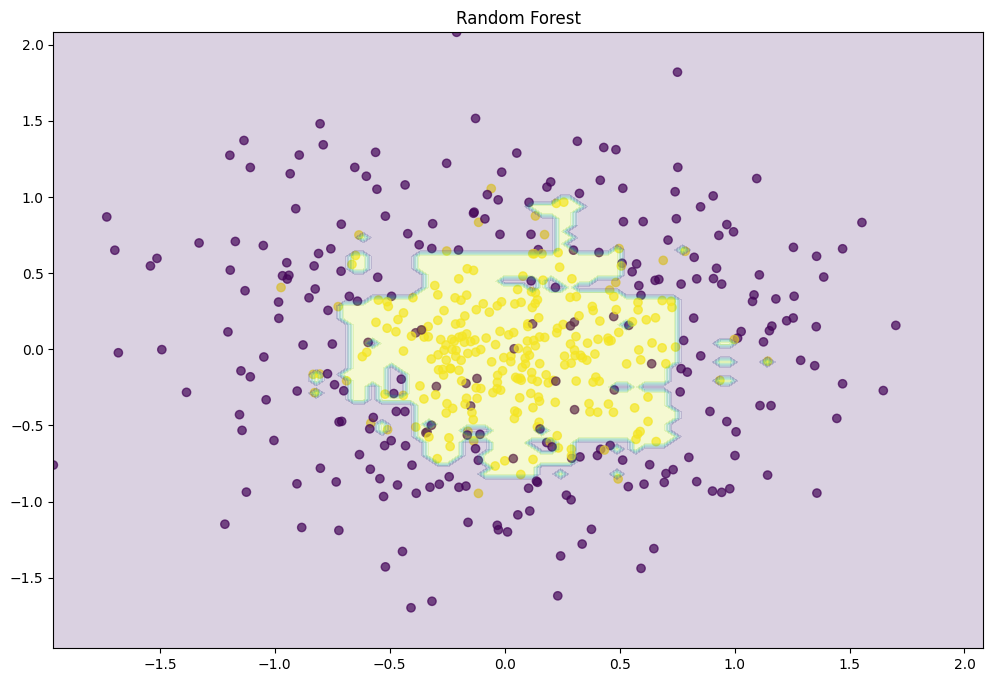

In [10]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=.7)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.title("Random Forest")
plt.show()

In [12]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_sample, noise):
    X = np.random.rand(n_sample) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_sample)
    X = X.reshape(n_sample, 1)
    return X, y

X_train, y_train = generate(n_sample=n_train, noise=noise)
X_test, y_test = generate(n_sample=n_test, noise=noise)

(-5.0, 5.0)

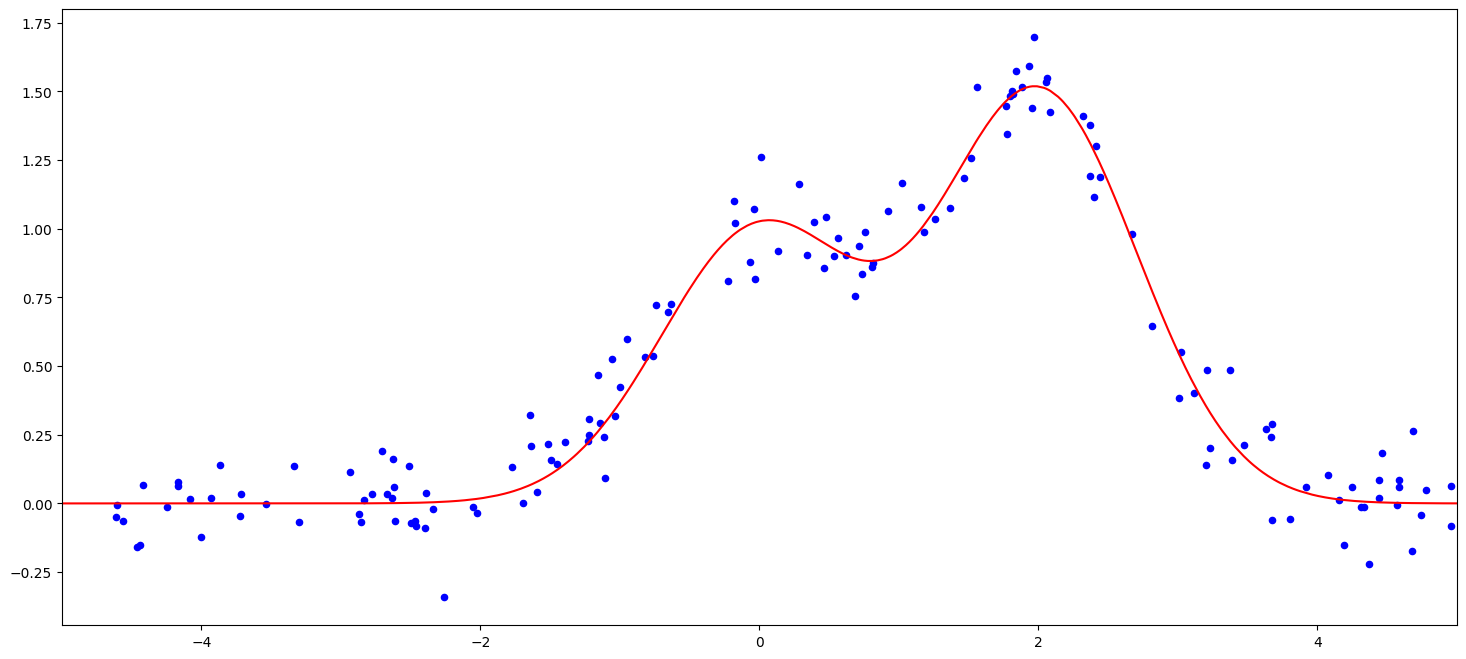

In [13]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c='b', s = 20)
plt.xlim((-5, 5))

Text(0.5, 1.0, 'Decision Tree, MSE = 22.70')

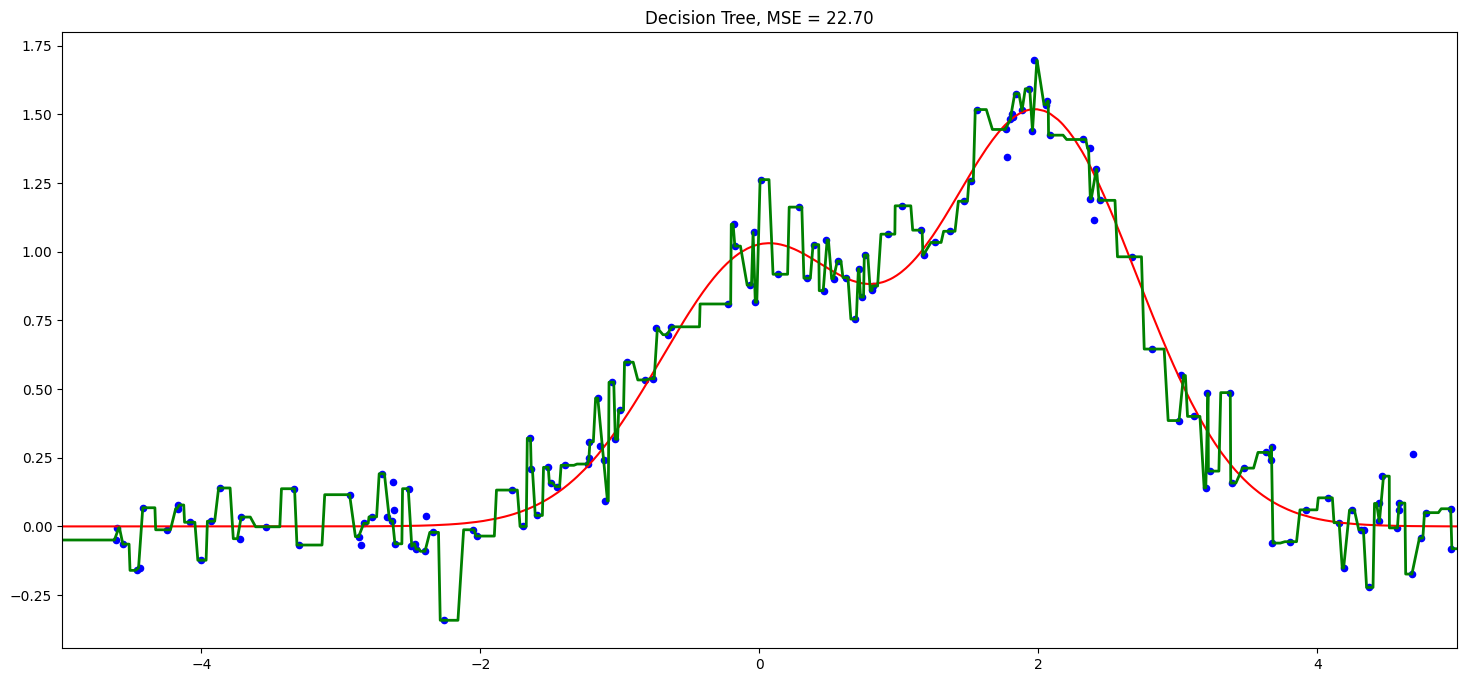

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c='b', s = 20)
plt.plot(X_test, d_predict, c='g', lw=2)
plt.xlim((-5, 5))
plt.title("Decision Tree, MSE = %.2f" % np.sum((y_test - d_predict) ** 2))

Text(0.5, 1.0, 'Random Forest, MSE = 16.16')

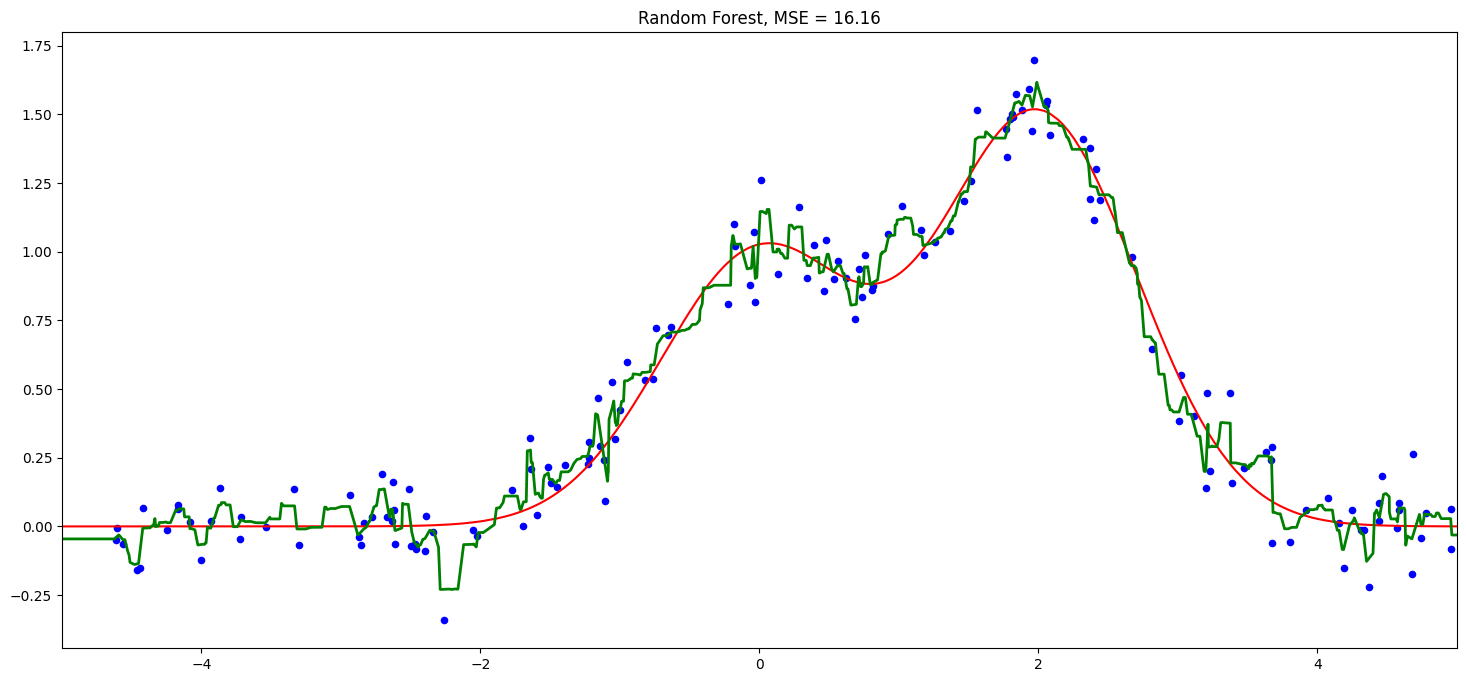

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
r_predict = rf.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c='b', s = 20)
plt.plot(X_test, r_predict, c='g', lw=2)
plt.xlim((-5, 5))
plt.title("Random Forest, MSE = %.2f" % np.sum((y_test - r_predict) ** 2))